# Heart Disease Prediction
Author:[Dr.Madeeha Tassadaq](https://www.linkedin.com/in/dr-madeeha-tassadaq-3104aa290/)\
Date:01.May,2024\
[Dataset]:(https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

`About Dataset`
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## Content
### Column Descriptions:
`id` (Unique id for each patient)
`age` (Age of the patient in years)
`origin` (place of study)
`sex` (Male/Female)
`cp` chest pain type 
* typical angina 
* atypical angina 
* non-anginal 
* asymptomatic
`trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
`cho` (serum cholesterol in mg/dl)
`fbs` (if fasting blood sugar > 120 mg/dl)
`restecg` (resting electrocardiographic results)
`Values`: [normal, stt abnormality, lv hypertrophy]
`thalach`: maximum heart rate achieved
`exang`: exercise-induced angina (True/ False)
`oldpeak`: ST depression induced by exercise relative to rest
`slope`: the slope of the peak exercise ST segment
`ca`: number of major vessels (0-3) colored by fluoroscopy
`thal`: 
* normal 
* fixed defect
* reversible defect
`num`: the predicted attribute
### Acknowledgements
#### Creator
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link
### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

View less
Usability
9.41

License
Data files © Original Authors


Expected update frequency
Annually

Tags

Health

Tabular

Health Conditions

Heart Conditions

Healthcare

Medicine

Feature Engineering


## Aims and Objectives
we will write this after some explotory data analysis


In [89]:
# import libraries
# to handle the data
import pandas as pd
import numpy as np
# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
# to preprocess the data 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
# model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# evaluate the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error,r2_score,mean_squared_error
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [90]:
# load file
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [91]:
## EDA
# explore each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [92]:
# checking the data shape
df.shape

(920, 16)

In [93]:
df['id'].min(),df['id'].max()

(1, 920)

In [94]:
df['age'].min(),df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

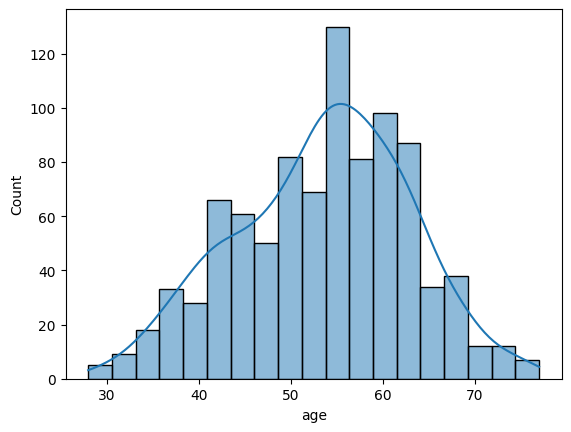

In [95]:
# draw a histograam to see age distribution
sns.histplot(data=df,x='age',kde=True)

In [96]:
Mode_age=df['age'].mode()[0]
Mean_age=df['age'].mean()
Median_age=df['age'].median()
# print the mean,median,mode round off 2 decimal places
print(f'Mean age:{Mean_age}' )
print(f'Median age:{Median_age} ')
print(f'Mode age:{Mode_age} ')


Mean age:53.51086956521739
Median age:54.0 
Mode age:54 


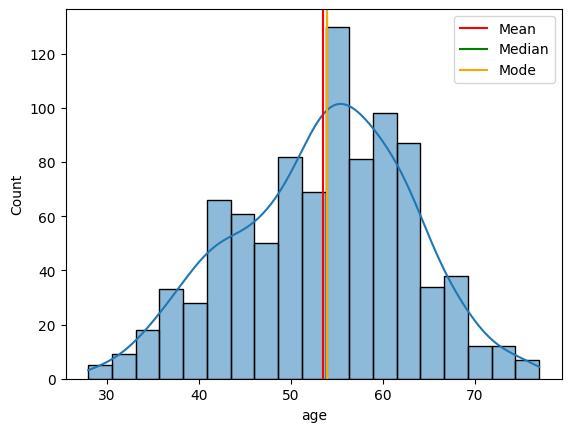

In [97]:
# plot the distribution of age with mean,median,mode
sns.histplot(data=df,x='age',kde=True)
plt.axvline(x=Mean_age,color='red',label='Mean')
plt.axvline(x=Median_age,color='green',label='Median')
plt.axvline(x=Mode_age,color='orange',label='Mode')
plt.legend()

<Axes: xlabel='age', ylabel='Count'>

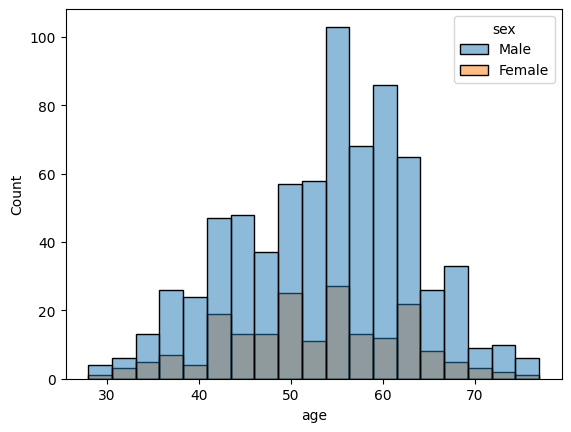

In [98]:
# lets find the relationship of age with sex
sns.histplot(data=df,x='age',hue='sex')

In [99]:
# lets find the relationship of dataset with sex
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [100]:
# lets  the count of male and female by dataset
df.groupby('dataset')['sex'].value_counts()


dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64

In [101]:
# find the relatiionship of age by sex
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [102]:
# lets find out the average age of male and female
df.groupby('sex')['age'].value_counts() 


sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [103]:
# count of male and female
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [104]:
# lets find the percentage of male and female round of 2
round(df['sex'].value_counts(normalize=True)*100,2)


sex
Male      78.91
Female    21.09
Name: proportion, dtype: float64

In [105]:
# lets find out average age of male and female
df.loc[df['sex']=='Male', 'age'].mean()
df.loc[df['sex']=='Female', 'age'].mean()


52.47422680412371

In [106]:
# Lets explore the cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [107]:
# find the percentage of those people with typical chest pain are more likely to have heart disease
print(df.loc[df['cp']=='typical angina'].nunique())


id          46
age         31
sex          2
dataset      4
cp           1
trestbps    19
chol        39
fbs          2
restecg      3
thalch      29
exang        2
oldpeak     21
slope        3
ca           3
thal         3
num          5
dtype: int64


<Axes: xlabel='cp', ylabel='count'>

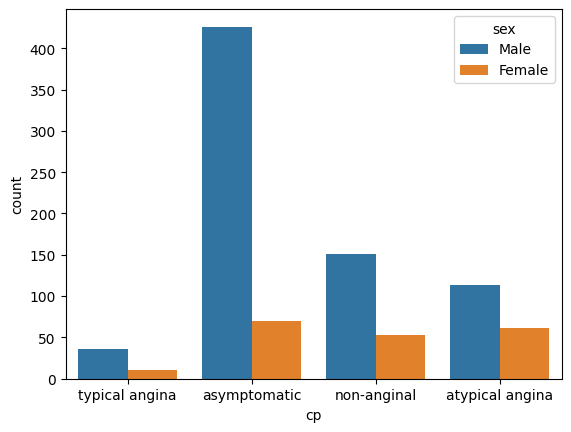

In [108]:
# countplot of chest pain with cp
sns.countplot(data=df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='count'>

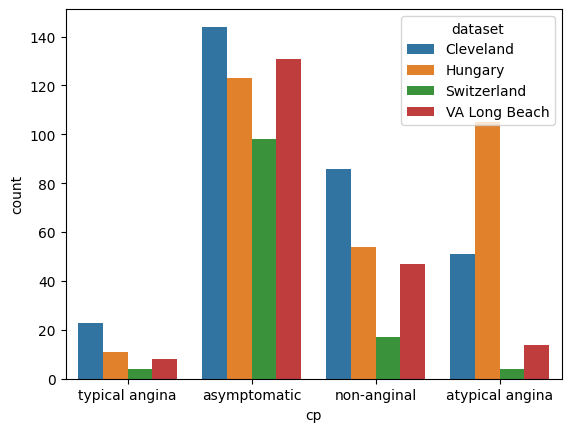

In [109]:
# find the countplot of cp with dataset
sns.countplot(df,x='cp',hue='dataset')

<Axes: xlabel='cp', ylabel='Count'>

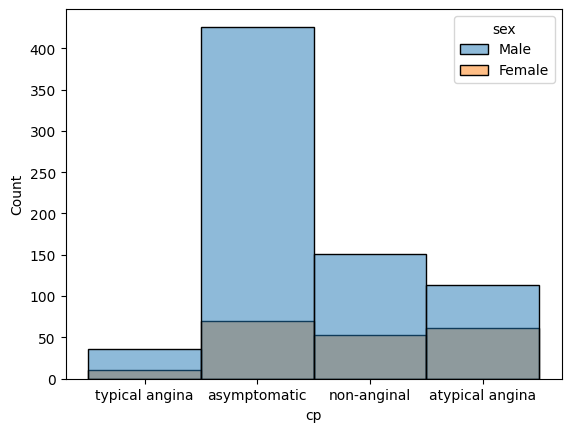

In [110]:
# Find the histplot of age column with sex
sns.histplot(data=df,x='cp',hue='sex')


In [111]:
# now lets explore the rest BP column
df['trestbps'].value_counts()

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64

<Axes: xlabel='trestbps', ylabel='Count'>

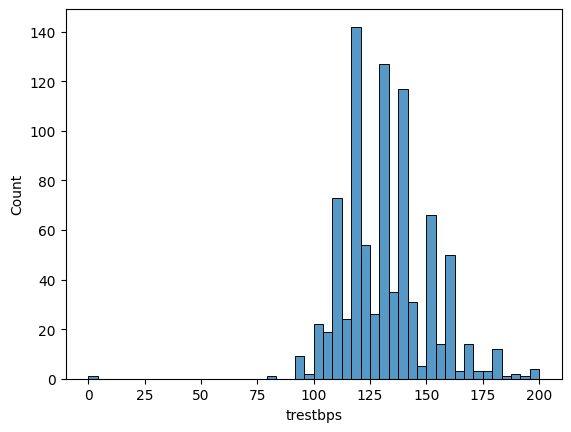

In [112]:
# create a coutplot of trestbps with sex
sns.histplot(data=df,x='trestbps')

In [113]:
# lets find the value counts of trestbps
df['trestbps'].value_counts

<bound method IndexOpsMixin.value_counts of 0      145.0
1      160.0
2      120.0
3      130.0
4      130.0
       ...  
915    127.0
916      NaN
917    122.0
918      NaN
919    120.0
Name: trestbps, Length: 920, dtype: float64>

In [114]:
# lets find out the percentage of null values
df['trestbps'].isnull().sum()
# df['trestbps'].isnull().sum()/len(df)*100

59

In [115]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [116]:
# lets find put the number of people with bp is 200
df.loc[df['trestbps']==200].nunique()

id          4
age         4
sex         2
dataset     3
cp          2
trestbps    1
chol        3
fbs         2
restecg     3
thalch      4
exang       2
oldpeak     4
slope       2
ca          1
thal        2
num         2
dtype: int64

In [117]:
# lets impute the missing values in numerical columns using iterative imputer by using for loop
numeric_columns=['trestbps','chol','thalch','oldpeak','ca',]
imputer=IterativeImputer(max_iter=10,random_state=42)

df[numeric_columns]=imputer.fit_transform(df[numeric_columns])



In [118]:
df[numeric_columns].isnull().sum()

trestbps    0
chol        0
thalch      0
oldpeak     0
ca          0
dtype: int64

In [119]:
# define a function on how to impute the missing valiues in categorical and object column using random forest classifier
from sklearn.preprocessing import LabelEncoder
def impute_missing_categorical(df):
    # Separate columns with missing values
    missing_cols = df.select_dtypes(include=['category', 'object']).columns[df.isnull().any()]
    
    for col in missing_cols:
        # Encode the categorical column
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        
        # Split the data into complete and missing
        complete_data = df[df[col].notnull()]
        missing_data = df[df[col].isnull()]
        
        # Train a Random Forest Classifier
        clf = RandomForestClassifier()
        clf.fit(complete_data.drop(col, axis=1), complete_data[col])
        
        # Predict the missing values
        missing_data[col] = clf.predict(missing_data.drop(col, axis=1))
        
        # Inverse transform the labels
        missing_data[col] = le.inverse_transform(missing_data[col].astype(int))
        
        # Update the original DataFrame
        df.loc[missing_data.index, col] = missing_data[col]
    
    return df.head()


#### Outputs
##### 1. The minimum of age to have heart disease is 28 and the max age is 70.
##### 2. There are are more male (78%)than female (21%)
####  3.More perople get the disease are at age 54.
####  4.More male get the heart disease than  male.
      5.Highest(304) number of people from cleveland and lowest(124)  from switzerland.
      6.Female are highest(113) from cleveland and lowest(6) from VA long beech.
      7.Male are highest(207) in hungary and lowest(113) in VA switzerland.
####  8.There are (496) people presented with asymptomatic chestpain.
      1.Only (46) people presented with typical chest pain.
      2.More males presented with asymptomatic chest pain.
####  9.More people have rest Bp in the range of 120.
####  10.max BP is 200



      
      

In [120]:
# function to impute missing values
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

thal       486
slope      309
fbs         90
exang       55
restecg      2
dtype: int64

In [121]:
data_missing_values=df.isnull().sum()[df.isnull().sum()>0].index.tolist()
data_missing_values

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        920 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [123]:
# separate the categorical , numeric and boolean columns
categorical_columns=['sex','dataset','cp','restecg','slope','thal','num']
numeric_columns=['age','trestbps','chol','thalch','oldpeak','ca']
boolean_columns=['fbs','exang']


In [124]:
# define a function to impute missing values

def impute_categorical_missing_data(passed_col):
    df_null=df[df[passed_col].isnull()]
    df_not_null=df[df[passed_col].not_null()]
# split the data into X and y
    X=df_not_null.drop(passed_col,axis=1)
    y=df_not_null[passed_col]
    label_encoder=LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in boolean_columns:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)
    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

            df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

# def impute_numeric_missing_data(passed_col):
    
    # df_null = df[df[passed_col].isnull()]
    # df_not_null = df[df[passed_col].notnull()]

    # X = df_not_null.drop(passed_col, axis=1)
    # y = df_not_null[passed_col]
    # label_encoder = LabelEncoder()

    # for col in X.columns:
    #     if X[col].dtype == 'object' or X[col].dtype == 'category':
    #         X[col] = label_encoder.fit_transform(X[col])
    
    # iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # rf_regressor = RandomForestRegressor()

    # rf_regressor.fit(X_train, y_train)

    # y_pred = rf_regressor.predict(X_test)

    # print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    # print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    # print("R2 =", r2_score(y_test, y_pred), "\n")

    # X = df_null.drop(passed_col, axis=1)

    # for col in X.columns:
    #     if X[col].dtype == 'object' or X[col].dtype == 'category':
    #         X[col] = label_encoder.fit_transform(X[col])
    # df_combined = pd.concat([df_not_null, df_null])
    
    # return df_combined[passed_col]
    

    


In [125]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in data_missing_values:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_columns:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_columns:
        df[col] = impute_numeric_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
Missing Values restecg : 0.22%


AttributeError: 'Series' object has no attribute 'not_null'